## Imports

In [1]:
# File
import pathlib

In [2]:
# Data
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [3]:
# Charting
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Deep Learning
from keras.models import Sequential
from keras.layers import Conv1D, Dropout, MaxPool1D, Dense, Flatten

## Get Data

In [5]:
train_df = pd.read_pickle('./data/train_df.pkl')

In [6]:
train_10noise_df = (pd.read_pickle('./data/10per_noise_train_df.pkl'))

In [7]:
train_df = train_df.loc[:100000-1, :].drop(['acc', 'vel'], axis=1)

In [8]:
train_df.head()

,exc,disp
0,0.540522,0.500082
1,0.476769,0.500266
2,0.551074,0.500894
3,0.554383,0.502817
4,0.470235,0.505744


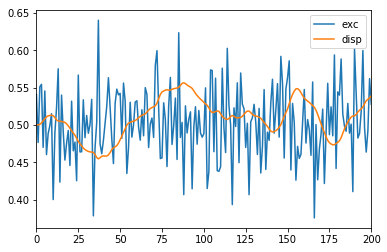

In [9]:
train_df.loc[:200, :].plot()

## Preprocessing

In [12]:
td_shape = train_df.shape
td_l = td_shape[0]

In [13]:
x_label = 'exc'
y_label = 'disp'

In [14]:
n_input = 100
n_output = 100

In [15]:
x_indices = [range(i, i+n_input) for i in range(td_l-n_input-n_output)]
y_indices = [range(i, i+n_output) for i in range(n_input, td_l-n_output)]

In [17]:
x = train_df.loc[:, x_label].values[x_indices]
y = train_df.loc[:, y_label].values[y_indices]

In [57]:
split_index = int(len(x)/3*2)
x = x.reshape(-1, 100, 1)
y = y.reshape(-1, 100)
X_train, X_test, y_train, y_test = (x[:split_index], x[split_index:], y[:split_index], y[split_index:])

## Model

In [59]:
class Model():
    
    def __init__(self):
        self.mdl = None
        self.hist = None

    def create_model(self, input_shape):

        # Model
        self.mdl = Sequential()

        # -- INPUT
        self.mdl.add(Conv1D(3, (10), input_shape=input_shape, activation='relu'))
        # model.add(MaxPool2D(pool_size=(1,2)))

        # -- HIDDEN
        self.mdl.add(Conv1D(8, (3), activation='relu'))
        # model.add(MaxPool2D(pool_size=(2,2)))
        self.mdl.add(Dropout(0.2))


        self.mdl.add(Flatten())
        self.mdl.add(Dense(500, activation='relu'))

        # -- OUTPUT
        self.mdl.add(Dense(100))


        # Prepare model for training
        self.mdl.compile(loss='mse',
                      optimizer='adam',
                      metrics=['mae'])

    
    def run_model(self, X_train, X_test, y_train, y_test):
    
        # Fit model
        self.hist = self.mdl.fit(X_train, y_train,
                            batch_size=5000,
                            epochs=100,
                            verbose=True,
                            validation_data=(X_test, y_test))

In [60]:
# Create Model
model = Model()
model.create_model(X_train[0].shape)

In [61]:
model.mdl.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 91, 3)             33        
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 89, 8)             80        
_________________________________________________________________
dropout_4 (Dropout)          (None, 89, 8)             0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 712)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 500)               356500    
_________________________________________________________________
dense_8 (Dense)              (None, 100)               50100     
Total params: 406,713
Trainable params: 406,713
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.run_model(X_train, X_test, y_train, y_test)

Train on 66533 samples, validate on 33267 samples
Epoch 1/100
66533/66533 [==============================] - 1s 12us/step - loss: 0.2001 - mean_absolute_error: 0.4381 - val_loss: 0.0353 - val_mean_absolute_error: 0.1662
Epoch 2/100
66533/66533 [==============================] - 0s 3us/step - loss: 0.0205 - mean_absolute_error: 0.1144 - val_loss: 0.0126 - val_mean_absolute_error: 0.0989
Epoch 3/100
66533/66533 [==============================] - 0s 4us/step - loss: 0.0081 - mean_absolute_error: 0.0735 - val_loss: 0.0044 - val_mean_absolute_error: 0.0537
Epoch 4/100
66533/66533 [==============================] - 0s 4us/step - loss: 0.0035 - mean_absolute_error: 0.0472 - val_loss: 0.0026 - val_mean_absolute_error: 0.0398
Epoch 5/100
66533/66533 [==============================] - 0s 5us/step - loss: 0.0029 - mean_absolute_error: 0.0428 - val_loss: 0.0025 - val_mean_absolute_error: 0.0396
Epoch 6/100
66533/66533 [==============================] - 0s 5us/step - loss: 0.0028 - mean_absolute_er

Epoch 49/100
66533/66533 [==============================] - 0s 3us/step - loss: 0.0027 - mean_absolute_error: 0.0410 - val_loss: 0.0023 - val_mean_absolute_error: 0.0379
Epoch 50/100
66533/66533 [==============================] - 0s 4us/step - loss: 0.0027 - mean_absolute_error: 0.0410 - val_loss: 0.0023 - val_mean_absolute_error: 0.0379
Epoch 51/100
66533/66533 [==============================] - 0s 4us/step - loss: 0.0027 - mean_absolute_error: 0.0409 - val_loss: 0.0023 - val_mean_absolute_error: 0.0379
Epoch 52/100
66533/66533 [==============================] - 0s 4us/step - loss: 0.0027 - mean_absolute_error: 0.0409 - val_loss: 0.0023 - val_mean_absolute_error: 0.0379
Epoch 53/100
66533/66533 [==============================] - 0s 4us/step - loss: 0.0027 - mean_absolute_error: 0.0409 - val_loss: 0.0023 - val_mean_absolute_error: 0.0380
Epoch 54/100
66533/66533 [==============================] - 0s 4us/step - loss: 0.0027 - mean_absolute_error: 0.0409 - val_loss: 0.0023 - val_mean_abs

66533/66533 [==============================] - 0s 4us/step - loss: 0.0026 - mean_absolute_error: 0.0407 - val_loss: 0.0023 - val_mean_absolute_error: 0.0379
Epoch 98/100
66533/66533 [==============================] - 0s 4us/step - loss: 0.0026 - mean_absolute_error: 0.0407 - val_loss: 0.0023 - val_mean_absolute_error: 0.0379
Epoch 99/100
66533/66533 [==============================] - 0s 3us/step - loss: 0.0026 - mean_absolute_error: 0.0407 - val_loss: 0.0023 - val_mean_absolute_error: 0.0379
Epoch 100/100
66533/66533 [==============================] - 0s 4us/step - loss: 0.0026 - mean_absolute_error: 0.0407 - val_loss: 0.0023 - val_mean_absolute_error: 0.0379


## Evaluation

In [67]:
# Scores
print(model.mdl.evaluate(X_test, y_test, verbose=0))

[0.0023330168450625185, 0.03793040062211696]


                  0
count  3.326700e+06
mean   5.955860e-01
std    1.010120e+01
min   -2.696414e+01
25%   -6.165996e+00
50%   -4.250199e-01
75%    6.176023e+00
max    8.278004e+01


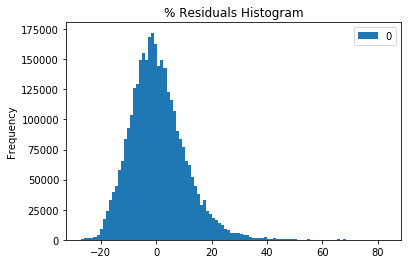

In [68]:
# Error plot (%)
preds = model.mdl.predict(X_test)
resids = pd.DataFrame(((preds - y_test)/y_test).reshape(-1))  * 100
resids.plot(kind='hist', bins=100, title='% Residuals Histogram')
print(resids.describe())

In [ ]:
# Prediction plots
full_preds = pd.DataFrame(model.predict(input_data_scaled.values.reshape(-1,100,3,1)).reshape(-1), columns=['Preds'])
full_preds = (full_preds - 0.5) * 2.0 * (no_noise_data['disp'].max()-no_noise_data['disp'].min()) + no_noise_data['disp'].mean()

plt.figure(figsize=(15,6))

min_index = 0
max_index = 300
top = full_preds[min_index:max_index]
middle = no_noise_data['disp'][min_index:max_index]
bottom = full_preds[min_index:max_index].subtract(no_noise_data['disp'][min_index:max_index],axis='index')

sns.set(style="ticks", color_codes=True)

plt.title('Displacement over Time')

plt.subplot(3, 1, 1)
plt.plot(middle.index, middle, '.-')
plt.ylabel('Actl Disp')

plt.subplot(3, 1, 2)
plt.plot(top.index, top, '.-')
plt.ylabel('Pred Disp')

plt.subplot(3, 1, 3)
plt.plot(bottom.index, bottom, '.-')
plt.ylabel('Residuals')

plt.xlabel('time (units)')
plt.show()

results = full_preds.join(no_noise_data['disp'])
results[:2000].plot(figsize=(15,6))